# Authour: Tabinda Bhat

## Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

Team1-teambatting first
dl_applied:is a mathematical formulation designed to calculate the target score
for the team batting second in a limited overs cricket match interrupted by weather or other circumstances.

In [2]:
df=pd.read_csv('matches.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.shape

(756, 18)

In [5]:
df.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [7]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
season,756.0,2013.444444,3.366895,2008.0,2011.00,2013.0,2016.00,2019.0
dl_applied,756.0,0.025132,0.156630,0.0,0.00,0.0,0.00,1.0
win_by_runs,756.0,13.283069,23.471144,0.0,0.00,0.0,19.00,146.0
win_by_wickets,756.0,3.350529,3.387963,0.0,0.00,4.0,6.00,10.0


### Total Seasons that we have got in the dataset

In [9]:
len(df['season'].unique())

12

### Season with most number of matches

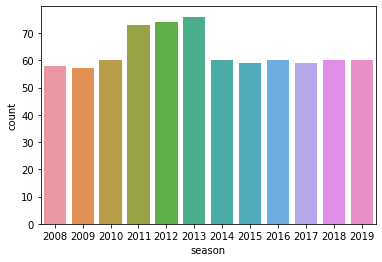

In [10]:
sns.countplot(x='season', data=df)
plt.show()


### lets also check the Teams who lost the Match by all the 10 Wickets

In [11]:
df[df['win_by_wickets']==10][['season','team1', 'team2','winner','win_by_wickets','player_of_match']]

,season,team1,team2,winner,win_by_wickets,player_of_match
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10,CA Lynn
34,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,10,Sandeep Sharma
71,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,10,AC Gilchrist
119,2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,10,DL Vettori
183,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,10,JH Kallis
298,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,10,SR Watson
376,2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians,10,DR Smith
390,2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,10,MEK Hussey
542,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,10,VR Aaron
590,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,10,B Kumar


### Analyzing winning scores

       win_by_runs  win_by_wickets
count   756.000000      756.000000
mean     13.283069        3.350529
std      23.471144        3.387963
min       0.000000        0.000000
25%       0.000000        0.000000
50%       0.000000        4.000000
75%      19.000000        6.000000
max     146.000000       10.000000


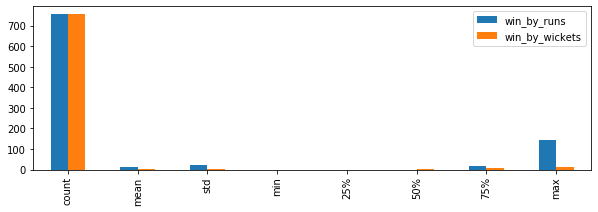

In [12]:
print(df[['win_by_runs', 'win_by_wickets']].describe())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 3)
df[['win_by_runs', 'win_by_wickets']].describe().plot(kind = 'bar')
plt.show()

### lets check the Number matches in each Season

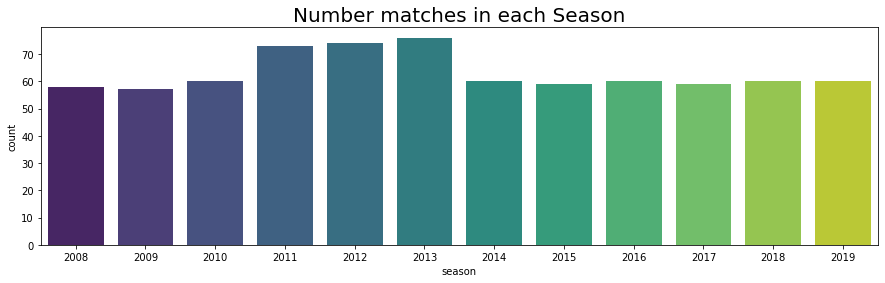

In [13]:
plt.subplots(figsize=(15,4))
sns.countplot(x = df['season'].sort_values(), palette = 'viridis')
plt.title('Number matches in each Season', fontsize = 20)
plt.show()

In [14]:
df['winner']=df['winner'].fillna(df['winner'].value_counts().index[0])
df['player_of_match']=df['player_of_match'].fillna(df['player_of_match'].value_counts().index[0])

### Most of the time cris gayle has been the player of the match

In [15]:
print(df['player_of_match'].value_counts().head())

CH Gayle          25
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64


### Number of times teams have opted for bating first

In [16]:
print(df['team1'].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


### Number of times teams have opted for batting second

In [17]:
print(df['team2'].value_counts())

Kolkata Knight Riders          95
Royal Challengers Bangalore    95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Rising Pune Supergiants         7
Kochi Tuskers Kerala            7
Name: team2, dtype: int64


In [18]:
print(df['winner'].value_counts())

Mumbai Indians                 113
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


### Match Count of each team

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


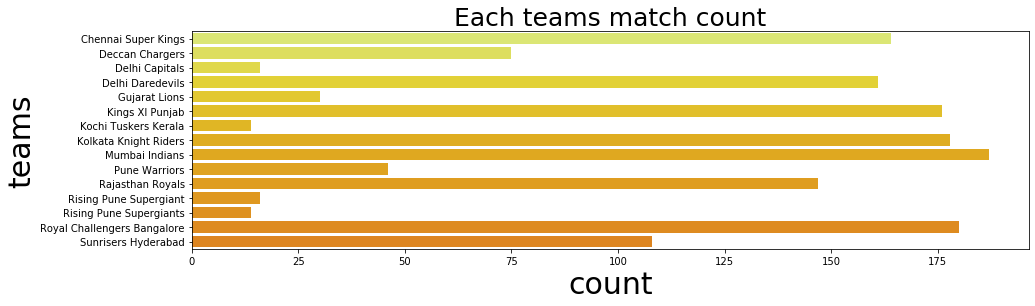

In [19]:
matches1=pd.DataFrame(df['team1'].value_counts())
matches2=pd.DataFrame(df['team2'].value_counts())
matches=pd.DataFrame(pd.concat([matches1, matches2], axis=1).sum(axis=1)).reset_index()
plt.subplots(figsize=(15,4))
sns.barplot(y=matches['index'], x=matches[0], palette = 'Wistia')
plt.title('Each teams match count', fontsize = 25)
plt.xlabel('count', fontsize = 30)
plt.ylabel('teams', fontsize = 30)
plt.show()

### Most successfull team

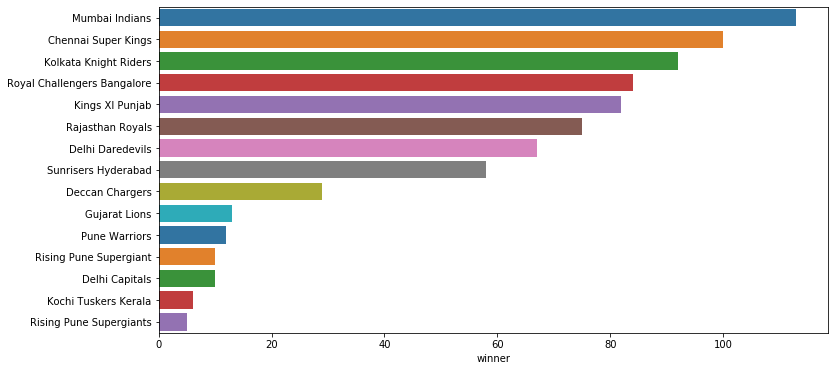

In [20]:
plt.subplots(figsize=(12,6))
data = df.winner.value_counts()
sns.barplot(y = data.index, x = data, palette="tab10");

### The team that has won by maximum runs

In [21]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

### The team that has won by maximum wickets

In [22]:
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

### The team that has won by minimum runs

In [23]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

### Sum of all the wickets a team has won by till now

In [24]:
df.groupby('winner')['win_by_wickets'].sum()

winner
Chennai Super Kings            289
Deccan Chargers                 72
Delhi Capitals                  29
Delhi Daredevils               275
Gujarat Lions                   65
Kings XI Punjab                268
Kochi Tuskers Kerala            30
Kolkata Knight Riders          351
Mumbai Indians                 307
Pune Warriors                   36
Rajasthan Royals               273
Rising Pune Supergiant          31
Rising Pune Supergiants         20
Royal Challengers Bangalore    314
Sunrisers Hyderabad            173
Name: win_by_wickets, dtype: int64

In [25]:
df['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Number of toss winning teams that has won the matches

In [26]:
effect = df['toss_winner'] == df['winner']
effect.groupby(effect).size()

False    363
True     393
dtype: int64

### lets compare the Toss Decisions

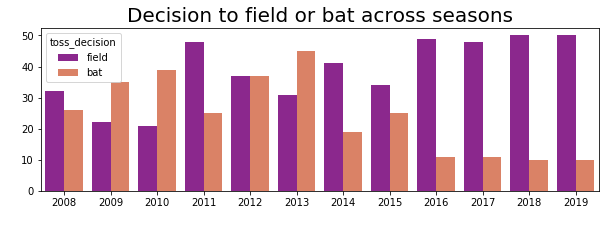

In [27]:
sns.countplot(df['season'].sort_values(), hue = df['toss_decision'], palette = 'plasma')
plt.title("Decision to field or bat across seasons", fontsize = 20)
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

### Frequency Of tosses won by different teams

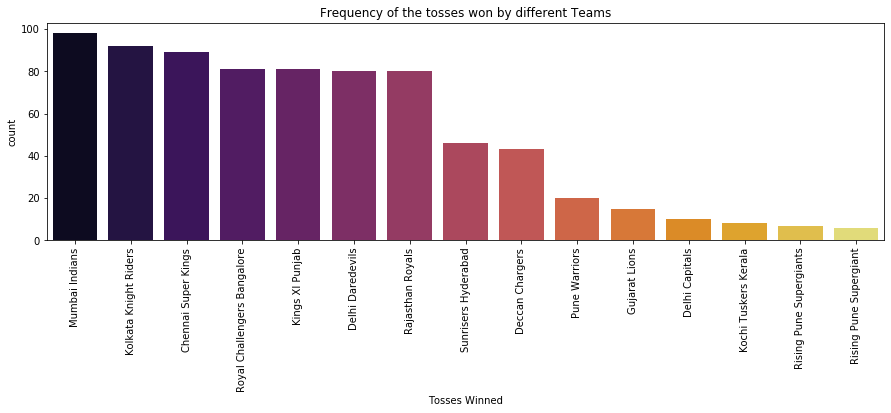

In [28]:
plt.subplots(figsize=(15,4))
sns.countplot('toss_winner',data=df,palette='inferno',order=df['toss_winner'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Tosses Winned')
plt.title('Frequency of the tosses won by different Teams')
plt.show()

### Most of the winning teams have taken the decision of fielding first 

In [29]:
Toss_decision_winner=df.groupby(['winner'],as_index=False)['toss_decision'].max()
Toss_decision_winner

,winner,toss_decision
0,Chennai Super Kings,field
1,Deccan Chargers,field
2,Delhi Capitals,field
3,Delhi Daredevils,field
4,Gujarat Lions,field
5,Kings XI Punjab,field
6,Kochi Tuskers Kerala,field
7,Kolkata Knight Riders,field
8,Mumbai Indians,field
9,Pune Warriors,field


### Maximum times Mumbai indians have won by runs

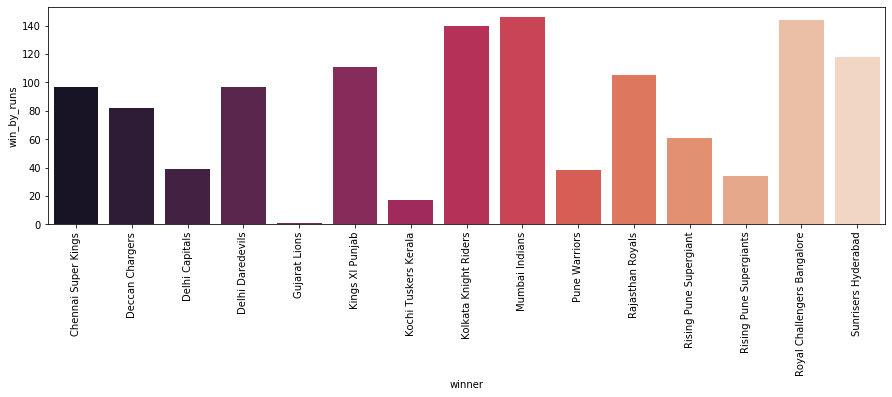

In [30]:
win_max=df.groupby(['winner'],as_index=False)['win_by_runs'].max()
win_max
plt.subplots(figsize=(15,4))
plt.xticks(rotation=90)
sns.barplot(win_max['winner'],win_max['win_by_runs'],palette="rocket")

### Maximum times Mumbai indians have won by runs

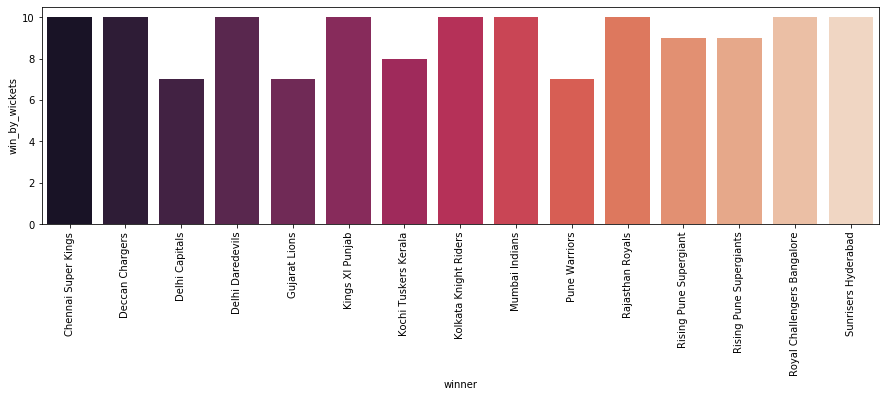

In [31]:
wic_max=df.groupby(['winner'],as_index=False)['win_by_wickets'].max()
wic_max
plt.subplots(figsize=(15,4))
plt.xticks(rotation=90)
sns.barplot(wic_max['winner'],wic_max['win_by_wickets'],palette="rocket")

### Most matches played venues

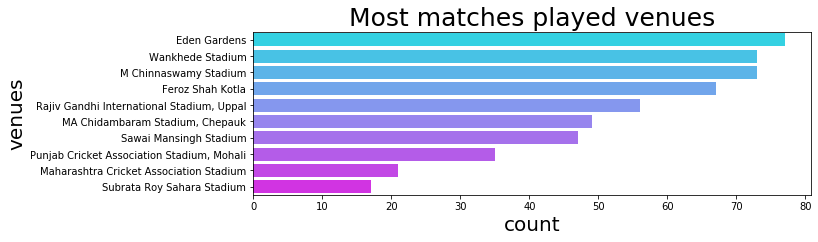

In [32]:
sns.barplot(y=df['venue'].value_counts().head(10).index, x=df['venue'].value_counts().head(10).values, palette = 'cool')
plt.title('Most matches played venues', fontsize=25)
plt.xlabel('count', fontsize=20)
plt.ylabel('venues',fontsize=20)
plt.show()

### Teams or players a company should endorse for its products: CH Gayle and AB de Villiers
### Most successful teams: Mumbai Indians and chennei superkings
### Most successful players: CH Gayle and AB de Villiers
### Factors contributing win or loss of a team:Most of the winning teams have taken the decision of fielding first, more the number of tosses you win more is chances of winning the game, more the matches you play more is chances to suceed